***
## 딥러닝 영상처리
### 케라스와 분류

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 유방암 데이터 분류

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [12]:
X = cancer.data
y = cancer.target

X.shape, y.shape

# X (569, 30) --> 30가지 검사를 한 데이터이다.

((569, 30), (569,))

In [13]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

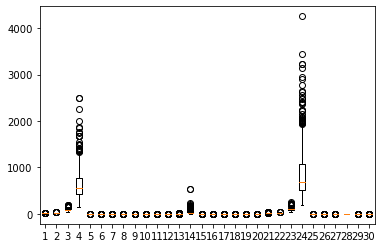

In [14]:
plt.boxplot(X);

In [15]:
# 정규화

X_norm = (X-X.mean(axis=0)) / X.std(axis=0)
X_norm.shape

(569, 30)

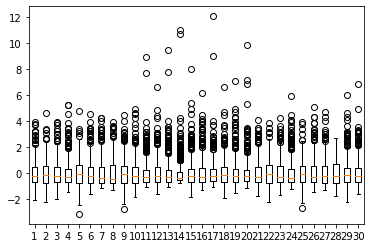

In [16]:
# 정규화 이후의 표?

plt.boxplot(X_norm);

In [17]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(30, ), activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

# sigmoid --> 분류 할려고

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

# optimizer='sgd' --> 
# acc --> 정확도

In [19]:
model.fit(X_norm, y, epochs=100, validation_split=0.25)

Epoch 1/100


2022-06-28 18:19:42.387892: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-28 18:19:42.554148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 20ms/step - loss: 0.8249 - acc: 0.4460 - val_loss: 0.7222 - val_acc: 0.5315
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5974 - acc: 0.6291 - val_loss: 0.5886 - val_acc: 0.6643
Epoch 3/100
 1/14 [=>............................] - ETA: 0s - loss: 0.5305 - acc: 0.7188

2022-06-28 18:19:43.340291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 7ms/step - loss: 0.4783 - acc: 0.8052 - val_loss: 0.5030 - val_acc: 0.7902
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.4036 - acc: 0.8685 - val_loss: 0.4430 - val_acc: 0.8252
Epoch 5/100
14/14 [==============================] - 0s 8ms/step - loss: 0.3536 - acc: 0.9014 - val_loss: 0.3997 - val_acc: 0.8462
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3179 - acc: 0.9085 - val_loss: 0.3664 - val_acc: 0.8671
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.2905 - acc: 0.9249 - val_loss: 0.3401 - val_acc: 0.8811
Epoch 8/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2685 - acc: 0.9343 - val_loss: 0.3193 - val_acc: 0.8811
Epoch 9/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2511 - acc: 0.9413 - val_loss: 0.3028 - val_acc: 0.8951
Epoch 10/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2365 - acc: 0.9460 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

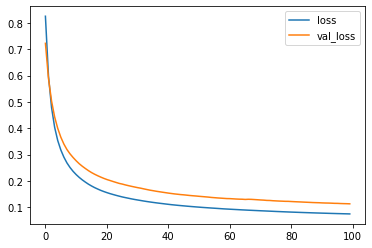

In [20]:
h = model.history.history
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

h.keys()

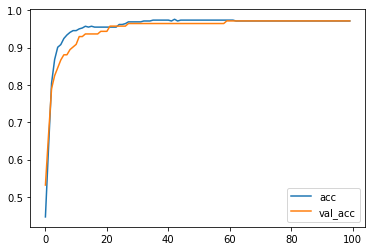

In [21]:
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.legend(['acc', 'val_acc'])

In [44]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(30, ), activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

# model.fit(X_norm, y, epochs=100, validation_split=0.25)
model.fit(X_norm, y, epochs=1000)


Epoch 1/1000
10/18 [===============>..............] - ETA: 0s - loss: 0.8655 - acc: 0.4875

2022-06-28 18:27:32.864078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 8ms/step - loss: 0.8505 - acc: 0.4728
Epoch 2/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.7172 - acc: 0.5483
Epoch 3/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.6498 - acc: 0.7012
Epoch 4/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.5953 - acc: 0.8190
Epoch 5/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.5420 - acc: 0.8682
Epoch 6/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4887 - acc: 0.8928
Epoch 7/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4369 - acc: 0.9069
Epoch 8/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3879 - acc: 0.9262
Epoch 9/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3434 - acc: 0.9332
Epoch 10/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3044 - acc: 0.9402
Epoch 11/1000
18/18 [==============================] - 0s 5ms/

In [45]:
model.fit(X_norm, y, epochs=100, validation_split=0.25)

Epoch 1/100
14/14 [==============================] - 0s 23ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 2/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 3/100


2022-06-28 18:30:15.622775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 8ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 4/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 5/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 6/100
14/14 [==============================] - 0s 15ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 7/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 8/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 9/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 10/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0017 - acc: 1

In [46]:
a = 0
c = 0
for i in model.history.history['val_acc']:
    c += 1;
    if(a < i):
        a = i
        p = c
    
print('val_acc Most High: ', a, p)

for i in model.history.history.keys():
 print(i, ':' , model.history.history[i][p])

val_acc Most High:  1.0 1
loss : 0.0017346780514344573
acc : 1.0
val_loss : 0.0015316185308620334
val_acc : 1.0


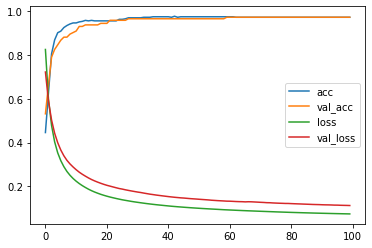

In [47]:
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['acc', 'val_acc', 'loss', 'val_loss']);

In [63]:
pred_y = model.predict(X_norm)
# display(pred_y, y)

print("예측 값:", np.count_nonzero(pred_y > 0.09))
print("실제 값:", np.count_nonzero(y))

18/18 [==============================] - 0s 2ms/step
예측해서 아픈 사람 수: 357
실제로 아픈사람: 357


In [61]:
(pred_y > 0.09) == y

array([[ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       ...,
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       [False, False, False, ..., False, False,  True]])

In [64]:
model.fit(X_norm, y, epochs=5000)

Epoch 1/5000
18/18 [==============================] - 0s 7ms/step - loss: 0.0016 - acc: 1.0000
Epoch 2/5000
18/18 [==============================] - 0s 7ms/step - loss: 0.0015 - acc: 1.0000
Epoch 3/5000
18/18 [==============================] - 0s 6ms/step - loss: 0.0015 - acc: 1.0000
Epoch 4/5000
18/18 [==============================] - 0s 6ms/step - loss: 0.0015 - acc: 1.0000
Epoch 5/5000
18/18 [==============================] - 0s 6ms/step - loss: 0.0015 - acc: 1.0000
Epoch 6/5000
18/18 [==============================] - 0s 6ms/step - loss: 0.0015 - acc: 1.0000
Epoch 7/5000
18/18 [==============================] - 0s 6ms/step - loss: 0.0015 - acc: 1.0000
Epoch 8/5000
18/18 [==============================] - 0s 6ms/step - loss: 0.0015 - acc: 1.0000
Epoch 9/5000
18/18 [==============================] - 0s 6ms/step - loss: 0.0014 - acc: 1.0000
Epoch 10/5000
18/18 [==============================] - 0s 6ms/step - loss: 0.0014 - acc: 1.0000
Epoch 11/5000
18/18 [============================

In [65]:
model.fit(X_norm, y, epochs=100, validation_split=0.25)

Epoch 1/100
14/14 [==============================] - 0s 10ms/step - loss: 6.8531e-05 - acc: 1.0000 - val_loss: 5.3634e-05 - val_acc: 1.0000
Epoch 2/100
14/14 [==============================] - 0s 8ms/step - loss: 6.8475e-05 - acc: 1.0000 - val_loss: 5.3723e-05 - val_acc: 1.0000
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 6.8438e-05 - acc: 1.0000 - val_loss: 5.3816e-05 - val_acc: 1.0000
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 6.8384e-05 - acc: 1.0000 - val_loss: 5.3900e-05 - val_acc: 1.0000
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 6.8340e-05 - acc: 1.0000 - val_loss: 5.3992e-05 - val_acc: 1.0000
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 6.8323e-05 - acc: 1.0000 - val_loss: 5.4015e-05 - val_acc: 1.0000
Epoch 7/100
14/14 [==============================] - 0s 12ms/step - loss: 6.8304e-05 - acc: 1.0000 - val_loss: 5.4162e-05 - val_acc: 1.0000
Epoch 8/100
14/14 [======

In [77]:
pred_y = model.predict(X_norm)
# display(pred_y, y)

print("예측 값:", np.count_nonzero(pred_y > 0.99))
print("실제 값:", np.count_nonzero(y))

18/18 [==============================] - 0s 2ms/step
예측해서 아픈 사람 수: 357
실제로 아픈사람: 357


In [84]:
h = model.history.history

plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['acc', 'val_acc', 'loss', 'val_loss']);

dict_keys([])


KeyError: 'acc'